In [1]:
import heapq

In [2]:
city_map = {
    'A': {'B': 1, 'C':4},
    'B': {'A': 1, 'C':2, 'D':5},
    'C': {'A': 4, 'B':2, 'D':1},
    'D': {'B': 5, 'C':1}
}

In [4]:
def dijkstra(graph, start, end):

  queue = [(0, start)]
  distances = {node: float('inf') for node in graph}
  distances[start] = 0
  previous_nodes = {node: None for node in graph}

  while queue:
    current_distance, current_node = heapq.heappop(queue)

    if current_node == end:
      break

    for neighbor, distance in graph[current_node].items():
      new_distance = current_distance + distance
      if new_distance < distances[neighbor]:
        distances[neighbor] = new_distance
        previous_nodes[neighbor] = current_node
        heapq.heappush(queue, (new_distance, neighbor))


  path, current_node = [], end
  while previous_nodes[current_node] is not None:
    path.insert(0, current_node)
    current_node = previous_nodes[current_node]
  if path:
    path.insert(0, start)
  return path, distances[end]


start = 'A'
end = 'D'
shortest_path, total_distance = dijkstra(city_map, start, end)

print(f"The shortest path from {start} to {end} is: {shortest_path}")
print(f"Total distance: {total_distance}")

The shortest path from A to D is: ['A', 'B', 'C', 'D']
Total distance: 4


In [5]:
!pip install networkx matplotlib

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

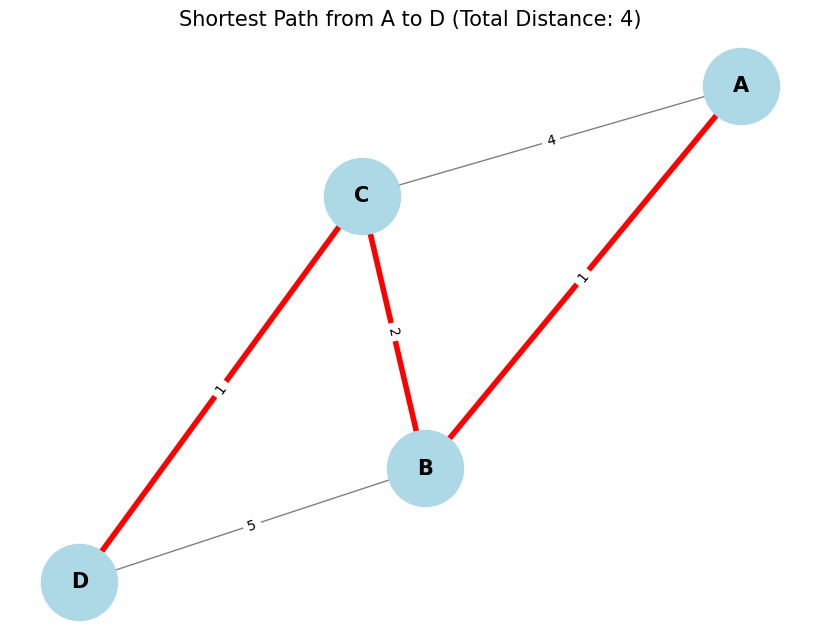

In [21]:
def visualise_city_map(graph, shortest_path):
  G = nx.Graph()

  for node, neighbors in graph.items():
    for neighbor, weight in neighbors.items():
      G.add_edge(node, neighbor, weight=weight)

  pos = nx.spring_layout(G)

  plt.figure(figsize=(8, 6))
  nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=15, font_weight='bold', edge_color='gray')

  path_edges = list(zip(shortest_path, shortest_path[1:]))
  nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=4)

  labels = nx.get_edge_attributes(G, 'weight')
  nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

  plt.title(f"Shortest Path from {start} to {end} (Total Distance: {total_distance})", size=15)
  plt.show()

visualise_city_map(city_map, shortest_path)

In [22]:
import heapq
import math

In [23]:
def euclidean_distance(node1, node2):
  positions = {
      'A': (0, 0),
      'B': (1, 0),
      'C': (2, 0),
      'D': (3, 0)
  }
  x1, y1 = positions[node1]
  x2, y2 = positions[node2]
  return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

The shortest path from A to D using A* is: ['A', 'B', 'C', 'D']
Total distance using A* : 4


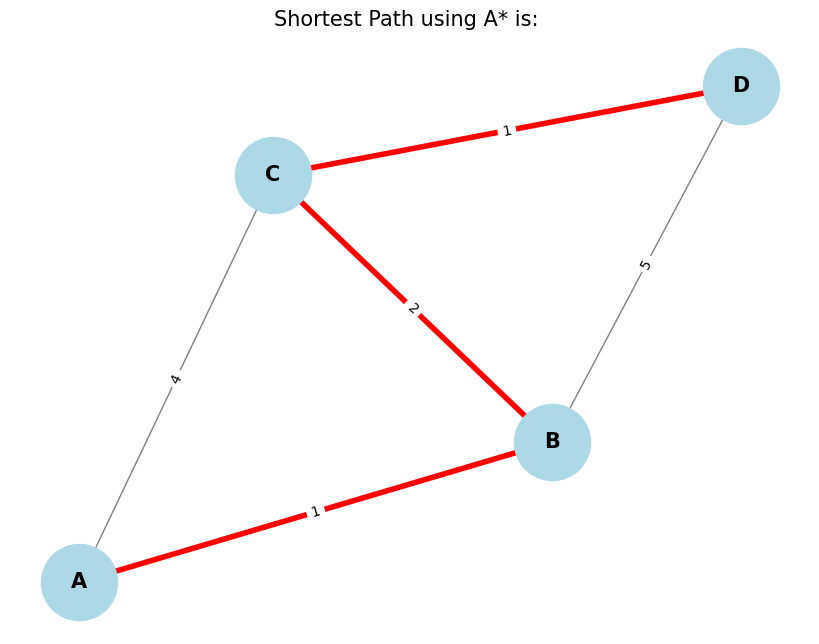

In [28]:
def a_star(graph, start, end):
  open_list = [(0, start)]
  g_scores = {node: float('inf') for node in graph}
  g_scores[start] = 0
  f_scores = {node: float('inf') for node in graph}
  f_scores[start] = euclidean_distance(start, end)
  previous_nodes = {node: None for node in graph}

  while open_list:
    current_f_score, current_node = heapq.heappop(open_list)

    if current_node == end:
      break

    for neighbor, distance in graph[current_node].items():
      tentative_g_score = g_scores[current_node] + distance

      if tentative_g_score < g_scores[neighbor]:
        g_scores[neighbor] = tentative_g_score
        f_scores[neighbor] = g_scores[neighbor] + euclidean_distance(neighbor, end)
        previous_nodes[neighbor] = current_node
        heapq.heappush(open_list, (f_scores[neighbor], neighbor))

  path, current_node = [], end
  while previous_nodes[current_node] is not None:
      path.insert(0, current_node)
      current_node = previous_nodes[current_node]
  if path:
      path.insert(0, start)
  return path, g_scores[end]

start = 'A'
end = 'D'
a_star_path, a_star_distance = a_star(city_map, start, end)

print(f"The shortest path from {start} to {end} using A* is: {a_star_path}")
print(f"Total distance using A* : {a_star_distance}")

visualise_city_map(city_map, a_star_path)